# Clustering with $K$-means and EM

Guilherme Franca (<guifranca@gmail.com>), 07/28/2016

Abstract: We briefly review K-means and Expectation Maximization (EM) algorithms. For EM we consider Gaussian Mixture Models (GMM) only. We implement both algorithms and show some simple simulations.


## $K$-means

Let us briefly review the $K$-means algorithm.
Let $C_k$, $k=1,\dotsc,K$, denote a cluster of points with center $\mu_k \in \mathbb{R}^D$. Consider a data set $\{ x_n \}_{n=1}^N$, where $x_n \in \mathbb{R}^D$. For each $x_n$ introduce a binary vector $z_n$ with components 
$$
z_{nk} = \begin{cases} 1 & \mbox{if $x_n \in C_k$} \\ 
0 & \mbox{otherwise} \end{cases}
$$ 
Thus the variable $z_n$ specifies to which cluster the point $x_n$ belongs to. Notice that $\sum_{j=1}^K z_{nk}=1$. Define the *distortion measure*
$$
J = \dfrac{1}{2} \sum_{n=1}^N\sum_{k=1}^K z_{nk} \| x_n - \mu_k \|^2 
$$
which is the sum of intra-cluster square distances. The problem we wanto to solve is
$$
\min_{z, \mu} J
$$
where $z = (z_1,\dotsc,z_N)^T \in\mathbb{R}^{N\times K}$, and $\mu = (\mu_1,\dotsc,\mu_k)^T\in\mathbb{R}^{K\times D}$.

We solve this problem through an iterative procedure consisting of two steps. First, we choose some initial values for each $\mu_k$. Then we minimize $J$ with respect to $z$ while keeping $\mu$ fixed (this is the analogous of the E-step in EM algorithm). Then we minimize $J$ whith respect to $\mu$ while keeping $z$ fixed (this is the analogous of the M-step in EM algorithm). We repeat this until convergence is attained. More specifically, the E-step consists of the update
$$
z_{nk} = \begin{cases} 
1 & \mbox{if $k=\mbox{argmin}_j \| x_n - \mu_j \|^2$} \\
0 & \mbox{otherwise}
\end{cases}
$$
For the  $M$-step, differentiate $J$ with respect to $\mu_k$ and equate to zero, yielding
$$
\mu_k = \dfrac{1}{N_k} \sum_{n=1}^N z_{nk} x_n
$$
where we defined $N_k = \sum_{n=1}^N z_{nk}$, the number of points belonging to cluster $C_k$. 

In simple words, $K$-means just associate the point $x_n$ to the cluster with closest center, then update the centers of each cluster by taking the average of the points associated to it. $K$-means is said to be hard-clustering since each point belongs to one and only cluster (in EM each point has a probability of belonging to each cluster, which is called soft-clustering).

This algorithm converges to a local minimum, however, it is highly sensitive to the initial conditions. A good initialization procedure is described in the following.


### $K$-means++

This initialization makes the algorithm more stable. Denote $D(x_i, \mu_j) = \| x_i - \mu_j \|^2$. 

1. Choose $\mu_1$ at random from $\{x_n\}$.
2. For each $x_n$, assign the value $d_n = \min\{D(x_n,\mu_1), \dotsc, D(x_n,\mu_k)\}$, where $k \le K$ is the number of centers already chosen at this stage.
3. Form a probability vector $p \in \mathbb{R}^N$ out of $\{d_n\}$ such that $p_n = \tfrac{d_n}{\sum_{j=1}^{N} d_j}$. Choose $\mu_k$ at random from $\{ x_n \}$ with probability distribution given by $p$.
4. Repeat until $k=K$.


### Implementation and Simulation

The above algorithm is implemented in the file **kmeans.py**.
Below we make use of this code.

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import kmeans
import distance

First we generate artificial data. We generate $3$ clusters from a $2$-dimensional gaussian distribution, and we plot this original data set.

In [3]:
mean = np.array([0, 0])
cov = np.array([[4, 0], [0, 1]])
data1 = np.random.multivariate_normal(mean, cov, 200)

mean = np.array([3, 5])
cov = np.array([[1, 0.8], [0.8, 2]])
data2 = np.random.multivariate_normal(mean, cov, 200)

mean = np.array([-2, 3])
cov = np.array([[0.5, 0], [0, 0.5]])
data3 = np.random.multivariate_normal(mean, cov, 200)

data = np.concatenate((data1, data2, data3))

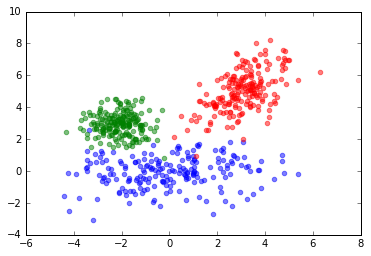

In [4]:
# plot the original data set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data1[:, 0], data1[:, 1], color='blue', alpha=0.5)
ax.scatter(data2[:, 0], data2[:, 1], color='red', alpha=0.5)
ax.scatter(data3[:, 0], data3[:, 1], color='green', alpha=0.5)

Now let us use $K$-Means to cluster this data set.

In [22]:
K=3
labels, centers = kmeans.kmeans(K, data, lambda a, b: np.linalg.norm(a-b))

In [23]:
print centers

[[-2.18535688  2.699826  ]
 [ 3.10582621  5.05838238]
 [ 0.33540473 -0.13716176]]


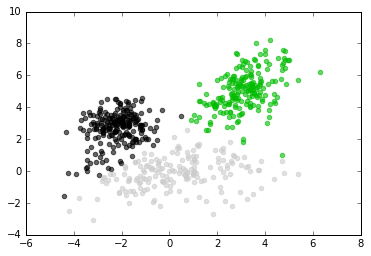

In [24]:
# K-means clustering results
fig = plt.figure()
ax = fig.add_subplot(111)
colors = getattr(cm, 'spectral')(np.linspace(0, 1, K))
for k in range(K):
    xs = data[:,0][np.where(labels==k)]
    ys = data[:,1][np.where(labels==k)]
    ax.scatter(xs, ys, color=colors[k], alpha=.6)

In [25]:
K=4
labels, centers = kmeans.kmeans(K, data, distance.euclidean)

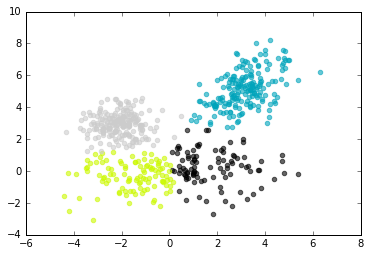

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = getattr(cm, 'spectral')(np.linspace(0, 1, K))
for k in range(K):
    xs = data[:,0][np.where(labels==k)]
    ys = data[:,1][np.where(labels==k)]
    ax.scatter(xs, ys, color=colors[k], alpha=.6)

## Maximum Likelihood

Given a data set $\{x_n\}$ and a probability density function $f(x\vert\theta)$, where $\theta$ represent the parameters, the data likelihood function is given by
$$
L(\theta) = \prod_{n=1}^{N} f(x_n \vert \theta)
$$
The goal of maximum likelihood estimation (MLE) is to solve 
$$
\widehat{\theta} = \mbox{argmax}_\theta L(\theta)
$$ 
It is more convenient to work with the log likelihood function
$$
\ell(\theta) = \sum_{n=1}^N \log f(x_n \vert \theta)
$$
and one tries to solve $\partial_\theta \ell(\theta) = 0$ to obtain a closed form solution, or if this is not possible one must solve the above optimization problem numerically.


### MLE for a Single Gaussian

Consider a Gaussian distribution 
$$
\mathcal{N}(x \vert \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2}} \dfrac{1}{|\Sigma|^{1/2}}
\exp\left\{ -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right\}
$$
We thus have
$$
\ell(\mu, \Sigma) = - \dfrac{N D}{2}\log 2\pi - \dfrac{N}{2} \log |\Sigma|
-\dfrac{1}{2} \sum_{n=1}^N (x_n-\mu)^T \Sigma^{-1} (x_n-\mu)
$$
Solving $\partial_{\mu} \ell = 0$ and $\partial_{\Sigma} \ell = 0$ we obtain the MLE estimators
$$
\widehat{\mu} = \dfrac{1}{N} \sum_{n=1}^N x_n \qquad
\widehat{\Sigma} = \dfrac{1}{N} \sum_{n=1}^N (x-\mu)(x-\mu)^T
$$
One can check that $\mathbb{E}[\widehat{\mu}] = \mu$ (unbiased) and $\mathbb{E}[\widehat{\Sigma}] = \tfrac{N-1}{N} \sigma$ (biased). Thus MLE underestimates the variance, but it is consistent. This is only a problem for small $N$. We redefine an unbiased estimator for the covariance matrix through
$$
\widehat{\Sigma} = \dfrac{1}{N-1} \sum_{n=1}^N (x-\mu)(x-\mu)^T
$$

**Implementation:** A simple MLE estimation for a single Gaussian is found in file **gaussian_mle.py**. Let us use this code in the following.

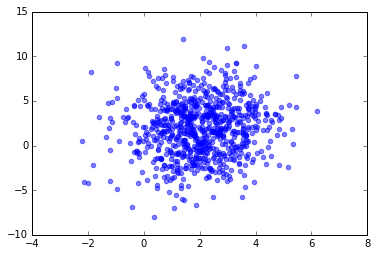

In [27]:
import gaussian_mle as gmle

# generate data from a 2D Gaussian
mu = np.array([2, 2])
sigma = np.array([[2, 0.5], [0.5, 10]])
gauss_data = np.random.multivariate_normal(mu, sigma, 800)

plt.scatter(gauss_data[:,0], gauss_data[:,1], color='blue', alpha=0.5)

In [28]:
muhat, sigmahat = gmle.gaussian_mle_estimator(gauss_data)
print muhat
print sigmahat

[ 2.00482603  1.90142087]
[[ 1.72574984  0.38147917]
 [ 0.38147917  9.95635933]]


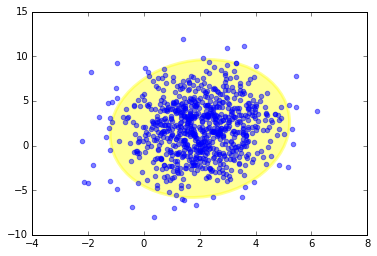

In [29]:
# plot the confidence interval for the estimated Gaussian containing 95% of points
gmle.scatter_ellipse(gauss_data, muhat, sigmahat)

To plot this ellipse we solve the eigenvalue problem $\Sigma v = \lambda v$, and in this 2D case we obtain two solutions $(\lambda_i,v_i)$ for $i=1,2$, and we assume $\lambda_1 \ge \lambda_2$.
Now the vector of maximum variation makes an angle $\alpha = \arctan \tfrac{(v_{1})_y}{(v_{1})_x}$ with the $x$-axis. The equation of the ellipse is then
$$
\left( \dfrac{x}{a} \right)^2+\left( \dfrac{y}{b} \right)^2 = 1
$$
with $a = 2\sqrt{c \lambda_1}$ and $b = \sqrt{c \lambda_2}$ and the major axis of the ellipse must make an angle $\alpha$ with the $x$-axis.
The constant $c=5.991$ give a $95\%$ confidence interval.

### MLE for Gaussian Mixtures

A mixture of $K$ gaussian components has the form
$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x \vert \mu_k, \Sigma_k)
$$
Integrating this over $x$ implies that $\sum_k \pi_k = 1$. Moreover, since $p(x) \ge 0$ and
$\mathcal{N}(\cdot \vert \cdot) \ge 0$ it implies $\pi_k \ge 0$ and thus $0\le \pi_k \le 1$. Thus $\pi_k$ is the (prior) probability that any given point belongs to component $k$.

Now let $z\in\mathbb{R}^K$ be a binary vector such that $z_k\in\{0,1\}$ and $\sum_k z_k = 1$. This vector tells us to which component a point $x$ was drawn from. There are $K$ different ways of building such a $z$, which is a latent variable. Notice that $p(z_k = 1) = \pi_k$. We have $p(x,z) = p(x|z)p(z)$ where
$$
p(z) = \prod_k \pi_k^{z_k} \qquad p(x|z) = \prod_k \mathcal{N}(x\vert \mu_k,\sigma_k)^{z_k}
$$ 
Therefore,
$$
p(x) = \sum_z p(x, z) = \sum_z p(x \vert z ) p(z) = \sum_z \prod_k \left(\mathcal{N}(x\vert \mu_k, \Sigma_k) \pi_k \right)^{z_k}
$$
The sum over $z$ implies that
$$
p(x) = 
\sum_{k=1}^K \pi_k \mathcal{N}(x \vert \mu_k, \Sigma_k)
$$
So we obtain a GMM through a latent variable $z$. Sometimes $x$ is called the observed data and $z$ the unobserved data.

Notice that $p(z_k=1) = \pi_k$ is the prior probability of any point $x$ coming from component $k$. The posterior probability, $\gamma(z_k)=p(z_k=1\vert x)$ is called the responsability. From Bayes' theorem we have
$$
\gamma(z_k) = \dfrac{\pi_k \mathcal{N}(x \vert \mu_k,\Sigma_k)}{\sum_{l} \pi_l \mathcal{N}(x \vert \mu_l, \Sigma_l)}
$$

The log likelihood function reads
$$
\ell(\mu,\Sigma,\pi) = \sum_{n=1}^{N} \log \left( \sum_{k=1}^K \pi_k \mathcal{N}(x_n\vert \mu_k, \Sigma_k)\right) + \lambda \left( \sum_k \pi_k - 1 \right)
$$
where we introduced a Lagrange multiplier, and $\mu = (\mu_1,\dotsc,\mu_K)^T$, $\Sigma=\{\Sigma_1,\dotsc,\Sigma_K\}$, and $\pi=(\pi_1,\dotsc,\pi_K)^T$. We introduce one latent variable $z_{n}$ for each data point $x_n$, and $z_{nk}$ denotes the $k$th component of this vector.
Now solving $\partial_{\mu_k} \ell = 0 $, $\partial_{\Sigma_k} \ell = 0$, and $\partial_{\pi_k} \ell = 0$ we obtain
$$
\widehat{\mu}_k = \dfrac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk})x_n
\qquad
\widehat{\Sigma}_k = \dfrac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk})(x_n-\mu_k)(x_n-\mu_k)^T
\qquad
\hat{\pi}_k = \dfrac{N_k}{N}
$$
where $N_k = \sum_{n=1}^N \gamma(z_{nk})$ is the effective number of points in component $k$. It seems this is a closed form solution but it's not since $\gamma$ has an involved dependency on the data. The EM algorithm solves this problem iteratively as follows.


### The EM Algorithm

It is an iterative algorithm consisting of two steps, the E-step and the M-step.

1. Initialize $\mu_k$ and $\Sigma_k$ for all $k=1,\dotsc,K$.
Compute $\ell(\mu,\Sigma,\pi)$. (We may use $K$-means to initialize these values.)
2. **E-step.** The expectation step consists in computing the responsabilities $\widehat{\gamma}(z_{nk})$ for each data point $x_n$ based on the current values of parameters $(\mu,\Sigma,\pi)$.
3. **M-Step.** The maximization step consists in maximizing $\ell$ with the current values of responsabilities, thus using the previously derived solution for $\widehat{\mu}$, $\widehat{\Sigma}$, and $\widehat{\pi}$.
4. Re-evaluate $\ell(\widehat{\mu},\widehat{\Sigma},\widehat{\pi})$ and check for convergence. Repeat from step 2 until convergence is attained.

This algorithm is implemented in file **gmm.py** and illustrated below.

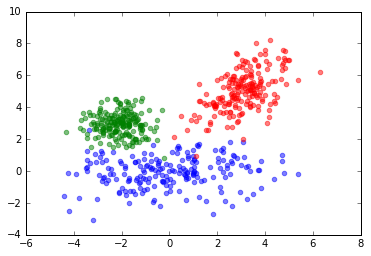

In [30]:
# let's use the same data as for K-means
# just ploting to remind ourselves
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data1[:, 0], data1[:, 1], color='blue', alpha=0.5)
ax.scatter(data2[:, 0], data2[:, 1], color='red', alpha=0.5)
ax.scatter(data3[:, 0], data3[:, 1], color='green', alpha=0.5)

In [31]:
# let's choose some random initialization
mus = [ np.array([4, 4]),
        np.array([8, 8]),
        np.array([-4, -4])
]
sigmas = [ 2.*np.eye(2),
           3.*np.eye(2),
           1.5*np.eye(2)
]
pis = [.5, .25, .25]

In [32]:
# now let us apply EM algorithm to the above data set
import gmm

g = gmm.GMM(data, mus, sigmas, pis)
g.fit()

In [33]:
muhat, sigmahat, pihat = g.mu, g.sigma, g.pi
print muhat
print sigmahat
print pihat

[array([-0.01891571,  0.00378851]), array([ 3.07546939,  5.08592288]), array([-2.12809035,  2.96514864])]
[array([[ 4.18402901,  0.28449401],
       [ 0.28449401,  1.06741929]]), array([[ 0.90994442,  0.62527458],
       [ 0.62527458,  1.44959372]]), array([[ 0.4954892 ,  0.02371528],
       [ 0.02371528,  0.49468726]])]
[0.34422700748839402, 0.32793198729403117, 0.32784100521757481]


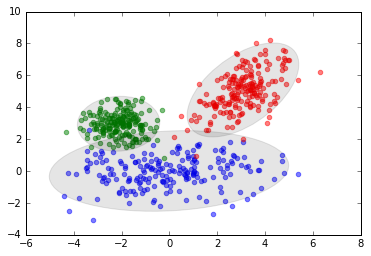

In [34]:
from matplotlib.patches import Ellipse

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data1[:, 0], data1[:, 1], color='blue', alpha=0.5)
ax.scatter(data2[:, 0], data2[:, 1], color='red', alpha=0.5)
ax.scatter(data3[:, 0], data3[:, 1], color='green', alpha=0.5)

for mu, sigma in zip(muhat, sigmahat):
    vals, vecs = np.linalg.eigh(sigma)
    idx = vals.argsort()[::-1]
    vals = vals[idx]
    vecs = vecs[:,idx]
    alfa = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    a, b = 2*np.sqrt(5.991*vals)
    ellipse = Ellipse(xy=mu, width=a, height=b, angle=alfa,
                      color='k', alpha=.1, zorder=1)
    ax.add_artist(ellipse)

Notice that EM does a much better job than $K$-means at clustering these points, however it's much slower.